In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

2022-04-01 15:26:10.829817: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-01 15:26:10.829859: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
df = yf.download('INFY').reset_index()

[*********************100%***********************]  1 of 1 completed


In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-03-11,0.583984,0.781250,0.583984,0.732422,0.515399,172512000
1,1999-03-12,0.734375,0.761719,0.671875,0.728516,0.512650,39897600
2,1999-03-15,0.730469,0.730469,0.658203,0.662109,0.465920,12672000
3,1999-03-16,0.667969,0.691406,0.656250,0.656250,0.461797,9984000
4,1999-03-17,0.656250,0.699219,0.652344,0.660156,0.464546,15449600
...,...,...,...,...,...,...,...
5799,2022-03-25,24.600000,24.750000,24.510000,24.730000,24.730000,3365400
5800,2022-03-28,24.730000,24.770000,24.520000,24.719999,24.719999,2834400
5801,2022-03-29,24.910000,25.120001,24.809999,25.110001,25.110001,3817200
5802,2022-03-30,24.820000,25.170000,24.820000,24.969999,24.969999,6945500


In [4]:
df1=df.reset_index()['Close']
df1.index = df['Date']

In [5]:
df1

Date
1999-03-11     0.732422
1999-03-12     0.728516
1999-03-15     0.662109
1999-03-16     0.656250
1999-03-17     0.660156
                ...    
2022-03-25    24.730000
2022-03-28    24.719999
2022-03-29    25.110001
2022-03-30    24.969999
2022-03-31    24.889999
Name: Close, Length: 5804, dtype: float64

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [7]:
print(len(df1))

5804


In [8]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size + 100
train_data,test_data = df1[0:training_size,:],df1[training_size-100:len(df1),:1]

In [9]:
training_size,test_size

(3772, 2132)

In [10]:
train_data

array([[0.00420027],
       [0.00404755],
       [0.00145099],
       ...,
       [0.28113391],
       [0.28352882],
       [0.2706256 ]])

In [11]:
test_data

array([[0.24213098],
       [0.24320624],
       [0.24183772],
       ...,
       [0.95738025],
       [0.9519061 ],
       [0.94877805]])

In [12]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        #print(a) ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [13]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [14]:
print(X_train.shape), print(y_train.shape)

(3671, 100)
(3671,)


(None, None)

In [15]:
print(X_test.shape), print(ytest.shape)

(2031, 100)
(2031,)


(None, None)

In [16]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [17]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [18]:
X_train.shape[1]

100

In [19]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


2022-04-01 15:26:49.634111: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-01 15:26:49.634168: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-01 15:26:49.634211: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (PrincePat3l): /proc/driver/nvidia/version does not exist
2022-04-01 15:26:49.634862: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=2,batch_size=64,verbose=1)

Epoch 1/2
58/58 [==============================] - 22s 247ms/step - loss: 0.0029 - val_loss: 7.8941e-04
Epoch 2/2
58/58 [==============================] - 12s 212ms/step - loss: 2.9081e-04 - val_loss: 9.3410e-04


In [22]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [23]:
X_train.shape

(3671, 100, 1)

In [24]:
X_test.shape

(2031, 100, 1)

In [25]:
train_predict.shape

(3671, 1)

In [26]:
test_predict.shape

(2031, 1)

In [27]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [28]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

4.905495498859124

In [29]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

11.026774528797137

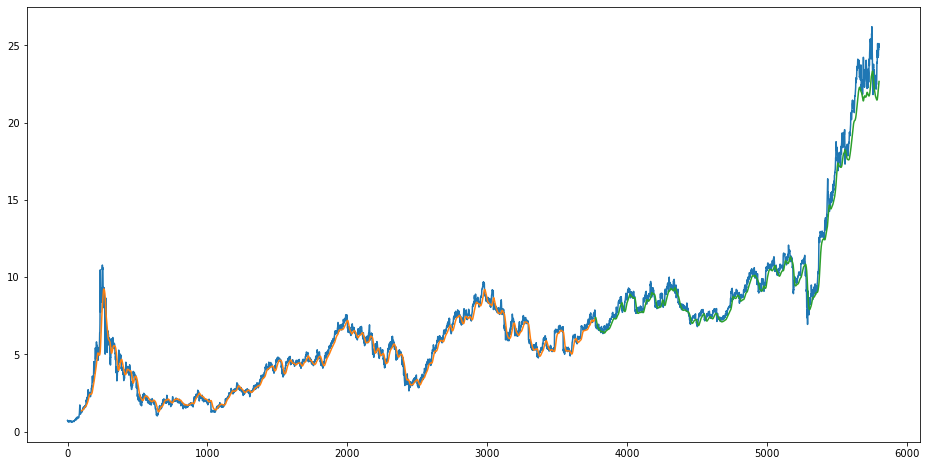

In [31]:
### Plotting 
# shift train predictions for plotting
plt.figure(figsize=(16,8))
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)-100+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [38]:
len(test_data)

2132

In [39]:
x_input=test_data[len(test_data)-100:].reshape(1,-1)
x_input.shape

(1, 100)

In [40]:
temp_input=list(x_input)
#print(temp_input)
#print("111111111111111111111------------")
temp_input=temp_input[0].tolist()
#print(temp_input)

In [41]:
#temp_input

In [42]:
# prediction for next 180 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<180):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.86726445]
101
1 day input [0.88660796 0.87331372 0.88269795 0.90224829 0.89951118 0.91515151
 0.90381228 0.90029321 0.89794719 0.86588465 0.87057669 0.85962854
 0.84359727 0.86001956 0.85845549 0.85298142 0.89208211 0.87018567
 0.84555227 0.8772238  0.89208211 0.88465296 0.88230693 0.85962854
 0.87057669 0.88504397 0.91827957 0.91554253 0.90185728 0.92258059
 0.93470186 0.94252195 0.96598237 0.96480933 0.96793738 0.96911042
 0.96520034 0.96324534 0.95738025 0.92570864 0.91827957 0.92179863
 0.94408601 0.95386118 0.98240466 0.97653958 1.         0.97302051
 0.93235576 0.90146626 0.89090906 0.87253176 0.85454541 0.85102634
 0.82834795 0.86158355 0.89716516 0.89521016 0.90498533 0.86549363
 0.87057669 0.8541544  0.87057669 0.89090906 0.87253176 0.8463343
 0.84320625 0.87057669 0.86862168 0.85259041 0.85571846 0.87683279
 0.86392957 0.84516126 0.86862168 0.85376338 0.8420332  0.85884651
 0.85610947 0.85376338 0.85845549 0.88778101 0.91006838 0.90772236
 0.91436948 0.94095796 0.92140762 

9 day output [[0.8530488]]
10 day input [0.86588465 0.87057669 0.85962854 0.84359727 0.86001956 0.85845549
 0.85298142 0.89208211 0.87018567 0.84555227 0.8772238  0.89208211
 0.88465296 0.88230693 0.85962854 0.87057669 0.88504397 0.91827957
 0.91554253 0.90185728 0.92258059 0.93470186 0.94252195 0.96598237
 0.96480933 0.96793738 0.96911042 0.96520034 0.96324534 0.95738025
 0.92570864 0.91827957 0.92179863 0.94408601 0.95386118 0.98240466
 0.97653958 1.         0.97302051 0.93235576 0.90146626 0.89090906
 0.87253176 0.85454541 0.85102634 0.82834795 0.86158355 0.89716516
 0.89521016 0.90498533 0.86549363 0.87057669 0.8541544  0.87057669
 0.89090906 0.87253176 0.8463343  0.84320625 0.87057669 0.86862168
 0.85259041 0.85571846 0.87683279 0.86392957 0.84516126 0.86862168
 0.85376338 0.8420332  0.85884651 0.85610947 0.85376338 0.85845549
 0.88778101 0.91006838 0.90772236 0.91436948 0.94095796 0.92140762
 0.95738025 0.93313779 0.95464321 0.92218958 0.94486804 0.92609966
 0.94017593 0.94252195

18 day output [[0.8176617]]
19 day input [0.84555227 0.8772238  0.89208211 0.88465296 0.88230693 0.85962854
 0.87057669 0.88504397 0.91827957 0.91554253 0.90185728 0.92258059
 0.93470186 0.94252195 0.96598237 0.96480933 0.96793738 0.96911042
 0.96520034 0.96324534 0.95738025 0.92570864 0.91827957 0.92179863
 0.94408601 0.95386118 0.98240466 0.97653958 1.         0.97302051
 0.93235576 0.90146626 0.89090906 0.87253176 0.85454541 0.85102634
 0.82834795 0.86158355 0.89716516 0.89521016 0.90498533 0.86549363
 0.87057669 0.8541544  0.87057669 0.89090906 0.87253176 0.8463343
 0.84320625 0.87057669 0.86862168 0.85259041 0.85571846 0.87683279
 0.86392957 0.84516126 0.86862168 0.85376338 0.8420332  0.85884651
 0.85610947 0.85376338 0.85845549 0.88778101 0.91006838 0.90772236
 0.91436948 0.94095796 0.92140762 0.95738025 0.93313779 0.95464321
 0.92218958 0.94486804 0.92609966 0.94017593 0.94252195 0.94213093
 0.95738025 0.9519061  0.94877805 0.86726445 0.86914617 0.86992633
 0.86962157 0.86834937

27 day output [[0.7860116]]
28 day input [0.91554253 0.90185728 0.92258059 0.93470186 0.94252195 0.96598237
 0.96480933 0.96793738 0.96911042 0.96520034 0.96324534 0.95738025
 0.92570864 0.91827957 0.92179863 0.94408601 0.95386118 0.98240466
 0.97653958 1.         0.97302051 0.93235576 0.90146626 0.89090906
 0.87253176 0.85454541 0.85102634 0.82834795 0.86158355 0.89716516
 0.89521016 0.90498533 0.86549363 0.87057669 0.8541544  0.87057669
 0.89090906 0.87253176 0.8463343  0.84320625 0.87057669 0.86862168
 0.85259041 0.85571846 0.87683279 0.86392957 0.84516126 0.86862168
 0.85376338 0.8420332  0.85884651 0.85610947 0.85376338 0.85845549
 0.88778101 0.91006838 0.90772236 0.91436948 0.94095796 0.92140762
 0.95738025 0.93313779 0.95464321 0.92218958 0.94486804 0.92609966
 0.94017593 0.94252195 0.94213093 0.95738025 0.9519061  0.94877805
 0.86726445 0.86914617 0.86992633 0.86962157 0.86834937 0.86627007
 0.8635537  0.86035782 0.85681891 0.8530488  0.84913528 0.84514439
 0.84112471 0.8371098

36 day output [[0.75791633]]
37 day input [0.96520034 0.96324534 0.95738025 0.92570864 0.91827957 0.92179863
 0.94408601 0.95386118 0.98240466 0.97653958 1.         0.97302051
 0.93235576 0.90146626 0.89090906 0.87253176 0.85454541 0.85102634
 0.82834795 0.86158355 0.89716516 0.89521016 0.90498533 0.86549363
 0.87057669 0.8541544  0.87057669 0.89090906 0.87253176 0.8463343
 0.84320625 0.87057669 0.86862168 0.85259041 0.85571846 0.87683279
 0.86392957 0.84516126 0.86862168 0.85376338 0.8420332  0.85884651
 0.85610947 0.85376338 0.85845549 0.88778101 0.91006838 0.90772236
 0.91436948 0.94095796 0.92140762 0.95738025 0.93313779 0.95464321
 0.92218958 0.94486804 0.92609966 0.94017593 0.94252195 0.94213093
 0.95738025 0.9519061  0.94877805 0.86726445 0.86914617 0.86992633
 0.86962157 0.86834937 0.86627007 0.8635537  0.86035782 0.85681891
 0.8530488  0.84913528 0.84514439 0.84112471 0.8371098  0.83312249
 0.82917738 0.82528299 0.82144386 0.8176617  0.81393635 0.81026715
 0.80665267 0.8030908

45 day output [[0.7326451]]
46 day input [0.97653958 1.         0.97302051 0.93235576 0.90146626 0.89090906
 0.87253176 0.85454541 0.85102634 0.82834795 0.86158355 0.89716516
 0.89521016 0.90498533 0.86549363 0.87057669 0.8541544  0.87057669
 0.89090906 0.87253176 0.8463343  0.84320625 0.87057669 0.86862168
 0.85259041 0.85571846 0.87683279 0.86392957 0.84516126 0.86862168
 0.85376338 0.8420332  0.85884651 0.85610947 0.85376338 0.85845549
 0.88778101 0.91006838 0.90772236 0.91436948 0.94095796 0.92140762
 0.95738025 0.93313779 0.95464321 0.92218958 0.94486804 0.92609966
 0.94017593 0.94252195 0.94213093 0.95738025 0.9519061  0.94877805
 0.86726445 0.86914617 0.86992633 0.86962157 0.86834937 0.86627007
 0.8635537  0.86035782 0.85681891 0.8530488  0.84913528 0.84514439
 0.84112471 0.8371098  0.83312249 0.82917738 0.82528299 0.82144386
 0.8176617  0.81393635 0.81026715 0.80665267 0.80309081 0.7995798
 0.79611784 0.79270375 0.78933531 0.78601158 0.782731   0.77949268
 0.77629513 0.77313757

54 day output [[0.7096887]]
55 day input [0.82834795 0.86158355 0.89716516 0.89521016 0.90498533 0.86549363
 0.87057669 0.8541544  0.87057669 0.89090906 0.87253176 0.8463343
 0.84320625 0.87057669 0.86862168 0.85259041 0.85571846 0.87683279
 0.86392957 0.84516126 0.86862168 0.85376338 0.8420332  0.85884651
 0.85610947 0.85376338 0.85845549 0.88778101 0.91006838 0.90772236
 0.91436948 0.94095796 0.92140762 0.95738025 0.93313779 0.95464321
 0.92218958 0.94486804 0.92609966 0.94017593 0.94252195 0.94213093
 0.95738025 0.9519061  0.94877805 0.86726445 0.86914617 0.86992633
 0.86962157 0.86834937 0.86627007 0.8635537  0.86035782 0.85681891
 0.8530488  0.84913528 0.84514439 0.84112471 0.8371098  0.83312249
 0.82917738 0.82528299 0.82144386 0.8176617  0.81393635 0.81026715
 0.80665267 0.80309081 0.7995798  0.79611784 0.79270375 0.78933531
 0.78601158 0.782731   0.77949268 0.77629513 0.77313757 0.77001917
 0.76693863 0.76389509 0.76088804 0.75791633 0.75497955 0.75207657
 0.74920678 0.74636948

62 day output [[0.6909051]]
63 day input [0.87057669 0.89090906 0.87253176 0.8463343  0.84320625 0.87057669
 0.86862168 0.85259041 0.85571846 0.87683279 0.86392957 0.84516126
 0.86862168 0.85376338 0.8420332  0.85884651 0.85610947 0.85376338
 0.85845549 0.88778101 0.91006838 0.90772236 0.91436948 0.94095796
 0.92140762 0.95738025 0.93313779 0.95464321 0.92218958 0.94486804
 0.92609966 0.94017593 0.94252195 0.94213093 0.95738025 0.9519061
 0.94877805 0.86726445 0.86914617 0.86992633 0.86962157 0.86834937
 0.86627007 0.8635537  0.86035782 0.85681891 0.8530488  0.84913528
 0.84514439 0.84112471 0.8371098  0.83312249 0.82917738 0.82528299
 0.82144386 0.8176617  0.81393635 0.81026715 0.80665267 0.80309081
 0.7995798  0.79611784 0.79270375 0.78933531 0.78601158 0.782731
 0.77949268 0.77629513 0.77313757 0.77001917 0.76693863 0.76389509
 0.76088804 0.75791633 0.75497955 0.75207657 0.74920678 0.74636948
 0.74356371 0.74078906 0.73804498 0.7353304  0.73264509 0.72998798
 0.72735912 0.72475713 0

71 day output [[0.67131346]]
72 day input [0.87683279 0.86392957 0.84516126 0.86862168 0.85376338 0.8420332
 0.85884651 0.85610947 0.85376338 0.85845549 0.88778101 0.91006838
 0.90772236 0.91436948 0.94095796 0.92140762 0.95738025 0.93313779
 0.95464321 0.92218958 0.94486804 0.92609966 0.94017593 0.94252195
 0.94213093 0.95738025 0.9519061  0.94877805 0.86726445 0.86914617
 0.86992633 0.86962157 0.86834937 0.86627007 0.8635537  0.86035782
 0.85681891 0.8530488  0.84913528 0.84514439 0.84112471 0.8371098
 0.83312249 0.82917738 0.82528299 0.82144386 0.8176617  0.81393635
 0.81026715 0.80665267 0.80309081 0.7995798  0.79611784 0.79270375
 0.78933531 0.78601158 0.782731   0.77949268 0.77629513 0.77313757
 0.77001917 0.76693863 0.76389509 0.76088804 0.75791633 0.75497955
 0.75207657 0.74920678 0.74636948 0.74356371 0.74078906 0.73804498
 0.7353304  0.73264509 0.72998798 0.72735912 0.72475713 0.72218215
 0.71963322 0.71710998 0.71461171 0.71213824 0.70968872 0.70726281
 0.70486009 0.70247996

80 day output [[0.6531128]]
81 day input [0.85845549 0.88778101 0.91006838 0.90772236 0.91436948 0.94095796
 0.92140762 0.95738025 0.93313779 0.95464321 0.92218958 0.94486804
 0.92609966 0.94017593 0.94252195 0.94213093 0.95738025 0.9519061
 0.94877805 0.86726445 0.86914617 0.86992633 0.86962157 0.86834937
 0.86627007 0.8635537  0.86035782 0.85681891 0.8530488  0.84913528
 0.84514439 0.84112471 0.8371098  0.83312249 0.82917738 0.82528299
 0.82144386 0.8176617  0.81393635 0.81026715 0.80665267 0.80309081
 0.7995798  0.79611784 0.79270375 0.78933531 0.78601158 0.782731
 0.77949268 0.77629513 0.77313757 0.77001917 0.76693863 0.76389509
 0.76088804 0.75791633 0.75497955 0.75207657 0.74920678 0.74636948
 0.74356371 0.74078906 0.73804498 0.7353304  0.73264509 0.72998798
 0.72735912 0.72475713 0.72218215 0.71963322 0.71710998 0.71461171
 0.71213824 0.70968872 0.70726281 0.70486009 0.70247996 0.70012236
 0.69778633 0.69547158 0.69317818 0.69090509 0.68865228 0.68641931
 0.68420583 0.68201137 0

89 day output [[0.6361022]]
90 day input [0.95464321 0.92218958 0.94486804 0.92609966 0.94017593 0.94252195
 0.94213093 0.95738025 0.9519061  0.94877805 0.86726445 0.86914617
 0.86992633 0.86962157 0.86834937 0.86627007 0.8635537  0.86035782
 0.85681891 0.8530488  0.84913528 0.84514439 0.84112471 0.8371098
 0.83312249 0.82917738 0.82528299 0.82144386 0.8176617  0.81393635
 0.81026715 0.80665267 0.80309081 0.7995798  0.79611784 0.79270375
 0.78933531 0.78601158 0.782731   0.77949268 0.77629513 0.77313757
 0.77001917 0.76693863 0.76389509 0.76088804 0.75791633 0.75497955
 0.75207657 0.74920678 0.74636948 0.74356371 0.74078906 0.73804498
 0.7353304  0.73264509 0.72998798 0.72735912 0.72475713 0.72218215
 0.71963322 0.71710998 0.71461171 0.71213824 0.70968872 0.70726281
 0.70486009 0.70247996 0.70012236 0.69778633 0.69547158 0.69317818
 0.69090509 0.68865228 0.68641931 0.68420583 0.68201137 0.67983568
 0.67767835 0.67553908 0.67341775 0.67131346 0.66922665 0.66715658
 0.66510302 0.66306561

98 day output [[0.6201194]]
99 day input [0.94877805 0.86726445 0.86914617 0.86992633 0.86962157 0.86834937
 0.86627007 0.8635537  0.86035782 0.85681891 0.8530488  0.84913528
 0.84514439 0.84112471 0.8371098  0.83312249 0.82917738 0.82528299
 0.82144386 0.8176617  0.81393635 0.81026715 0.80665267 0.80309081
 0.7995798  0.79611784 0.79270375 0.78933531 0.78601158 0.782731
 0.77949268 0.77629513 0.77313757 0.77001917 0.76693863 0.76389509
 0.76088804 0.75791633 0.75497955 0.75207657 0.74920678 0.74636948
 0.74356371 0.74078906 0.73804498 0.7353304  0.73264509 0.72998798
 0.72735912 0.72475713 0.72218215 0.71963322 0.71710998 0.71461171
 0.71213824 0.70968872 0.70726281 0.70486009 0.70247996 0.70012236
 0.69778633 0.69547158 0.69317818 0.69090509 0.68865228 0.68641931
 0.68420583 0.68201137 0.67983568 0.67767835 0.67553908 0.67341775
 0.67131346 0.66922665 0.66715658 0.66510302 0.66306561 0.66104412
 0.65903848 0.65704817 0.65507317 0.65311283 0.65116721 0.64923608
 0.64731902 0.64541602 

107 day output [[0.60503167]]
108 day input [0.85681891 0.8530488  0.84913528 0.84514439 0.84112471 0.8371098
 0.83312249 0.82917738 0.82528299 0.82144386 0.8176617  0.81393635
 0.81026715 0.80665267 0.80309081 0.7995798  0.79611784 0.79270375
 0.78933531 0.78601158 0.782731   0.77949268 0.77629513 0.77313757
 0.77001917 0.76693863 0.76389509 0.76088804 0.75791633 0.75497955
 0.75207657 0.74920678 0.74636948 0.74356371 0.74078906 0.73804498
 0.7353304  0.73264509 0.72998798 0.72735912 0.72475713 0.72218215
 0.71963322 0.71710998 0.71461171 0.71213824 0.70968872 0.70726281
 0.70486009 0.70247996 0.70012236 0.69778633 0.69547158 0.69317818
 0.69090509 0.68865228 0.68641931 0.68420583 0.68201137 0.67983568
 0.67767835 0.67553908 0.67341775 0.67131346 0.66922665 0.66715658
 0.66510302 0.66306561 0.66104412 0.65903848 0.65704817 0.65507317
 0.65311283 0.65116721 0.64923608 0.64731902 0.64541602 0.64352667
 0.64165092 0.63978833 0.6379388  0.6361022  0.63427818 0.63246679
 0.63066751 0.62888

116 day output [[0.59072846]]
117 day input [0.82144386 0.8176617  0.81393635 0.81026715 0.80665267 0.80309081
 0.7995798  0.79611784 0.79270375 0.78933531 0.78601158 0.782731
 0.77949268 0.77629513 0.77313757 0.77001917 0.76693863 0.76389509
 0.76088804 0.75791633 0.75497955 0.75207657 0.74920678 0.74636948
 0.74356371 0.74078906 0.73804498 0.7353304  0.73264509 0.72998798
 0.72735912 0.72475713 0.72218215 0.71963322 0.71710998 0.71461171
 0.71213824 0.70968872 0.70726281 0.70486009 0.70247996 0.70012236
 0.69778633 0.69547158 0.69317818 0.69090509 0.68865228 0.68641931
 0.68420583 0.68201137 0.67983568 0.67767835 0.67553908 0.67341775
 0.67131346 0.66922665 0.66715658 0.66510302 0.66306561 0.66104412
 0.65903848 0.65704817 0.65507317 0.65311283 0.65116721 0.64923608
 0.64731902 0.64541602 0.64352667 0.64165092 0.63978833 0.6379388
 0.6361022  0.63427818 0.63246679 0.63066751 0.62888032 0.62710506
 0.62534165 0.62358958 0.62184888 0.62011939 0.61840099 0.61669344
 0.61499649 0.6133101

125 day output [[0.5771181]]
126 day input [0.78933531 0.78601158 0.782731   0.77949268 0.77629513 0.77313757
 0.77001917 0.76693863 0.76389509 0.76088804 0.75791633 0.75497955
 0.75207657 0.74920678 0.74636948 0.74356371 0.74078906 0.73804498
 0.7353304  0.73264509 0.72998798 0.72735912 0.72475713 0.72218215
 0.71963322 0.71710998 0.71461171 0.71213824 0.70968872 0.70726281
 0.70486009 0.70247996 0.70012236 0.69778633 0.69547158 0.69317818
 0.69090509 0.68865228 0.68641931 0.68420583 0.68201137 0.67983568
 0.67767835 0.67553908 0.67341775 0.67131346 0.66922665 0.66715658
 0.66510302 0.66306561 0.66104412 0.65903848 0.65704817 0.65507317
 0.65311283 0.65116721 0.64923608 0.64731902 0.64541602 0.64352667
 0.64165092 0.63978833 0.6379388  0.6361022  0.63427818 0.63246679
 0.63066751 0.62888032 0.62710506 0.62534165 0.62358958 0.62184888
 0.62011939 0.61840099 0.61669344 0.61499649 0.61331016 0.61163437
 0.60996866 0.60831296 0.60666722 0.60503167 0.60340536 0.6017887
 0.6001814  0.598583

133 day output [[0.5655387]]
134 day input [0.76389509 0.76088804 0.75791633 0.75497955 0.75207657 0.74920678
 0.74636948 0.74356371 0.74078906 0.73804498 0.7353304  0.73264509
 0.72998798 0.72735912 0.72475713 0.72218215 0.71963322 0.71710998
 0.71461171 0.71213824 0.70968872 0.70726281 0.70486009 0.70247996
 0.70012236 0.69778633 0.69547158 0.69317818 0.69090509 0.68865228
 0.68641931 0.68420583 0.68201137 0.67983568 0.67767835 0.67553908
 0.67341775 0.67131346 0.66922665 0.66715658 0.66510302 0.66306561
 0.66104412 0.65903848 0.65704817 0.65507317 0.65311283 0.65116721
 0.64923608 0.64731902 0.64541602 0.64352667 0.64165092 0.63978833
 0.6379388  0.6361022  0.63427818 0.63246679 0.63066751 0.62888032
 0.62710506 0.62534165 0.62358958 0.62184888 0.62011939 0.61840099
 0.61669344 0.61499649 0.61331016 0.61163437 0.60996866 0.60831296
 0.60666722 0.60503167 0.60340536 0.6017887  0.6001814  0.59858352
 0.59699464 0.59541482 0.593844   0.59228176 0.59072846 0.58918339
 0.5876469  0.58611

142 day output [[0.5530353]]
143 day input [0.73804498 0.7353304  0.73264509 0.72998798 0.72735912 0.72475713
 0.72218215 0.71963322 0.71710998 0.71461171 0.71213824 0.70968872
 0.70726281 0.70486009 0.70247996 0.70012236 0.69778633 0.69547158
 0.69317818 0.69090509 0.68865228 0.68641931 0.68420583 0.68201137
 0.67983568 0.67767835 0.67553908 0.67341775 0.67131346 0.66922665
 0.66715658 0.66510302 0.66306561 0.66104412 0.65903848 0.65704817
 0.65507317 0.65311283 0.65116721 0.64923608 0.64731902 0.64541602
 0.64352667 0.64165092 0.63978833 0.6379388  0.6361022  0.63427818
 0.63246679 0.63066751 0.62888032 0.62710506 0.62534165 0.62358958
 0.62184888 0.62011939 0.61840099 0.61669344 0.61499649 0.61331016
 0.61163437 0.60996866 0.60831296 0.60666722 0.60503167 0.60340536
 0.6017887  0.6001814  0.59858352 0.59699464 0.59541482 0.593844
 0.59228176 0.59072846 0.58918339 0.5876469  0.58611882 0.58459866
 0.58308685 0.5815829  0.58008695 0.57859868 0.5771181  0.57564509
 0.57417959 0.5727214

151 day output [[0.54103124]]
152 day input [0.71461171 0.71213824 0.70968872 0.70726281 0.70486009 0.70247996
 0.70012236 0.69778633 0.69547158 0.69317818 0.69090509 0.68865228
 0.68641931 0.68420583 0.68201137 0.67983568 0.67767835 0.67553908
 0.67341775 0.67131346 0.66922665 0.66715658 0.66510302 0.66306561
 0.66104412 0.65903848 0.65704817 0.65507317 0.65311283 0.65116721
 0.64923608 0.64731902 0.64541602 0.64352667 0.64165092 0.63978833
 0.6379388  0.6361022  0.63427818 0.63246679 0.63066751 0.62888032
 0.62710506 0.62534165 0.62358958 0.62184888 0.62011939 0.61840099
 0.61669344 0.61499649 0.61331016 0.61163437 0.60996866 0.60831296
 0.60666722 0.60503167 0.60340536 0.6017887  0.6001814  0.59858352
 0.59699464 0.59541482 0.593844   0.59228176 0.59072846 0.58918339
 0.5876469  0.58611882 0.58459866 0.58308685 0.5815829  0.58008695
 0.57859868 0.5771181  0.57564509 0.57417959 0.57272148 0.5712707
 0.56982702 0.56839061 0.56696129 0.5655387  0.56412315 0.56271434
 0.56131214 0.55991

160 day output [[0.5294773]]
161 day input [0.69317818 0.69090509 0.68865228 0.68641931 0.68420583 0.68201137
 0.67983568 0.67767835 0.67553908 0.67341775 0.67131346 0.66922665
 0.66715658 0.66510302 0.66306561 0.66104412 0.65903848 0.65704817
 0.65507317 0.65311283 0.65116721 0.64923608 0.64731902 0.64541602
 0.64352667 0.64165092 0.63978833 0.6379388  0.6361022  0.63427818
 0.63246679 0.63066751 0.62888032 0.62710506 0.62534165 0.62358958
 0.62184888 0.62011939 0.61840099 0.61669344 0.61499649 0.61331016
 0.61163437 0.60996866 0.60831296 0.60666722 0.60503167 0.60340536
 0.6017887  0.6001814  0.59858352 0.59699464 0.59541482 0.593844
 0.59228176 0.59072846 0.58918339 0.5876469  0.58611882 0.58459866
 0.58308685 0.5815829  0.58008695 0.57859868 0.5771181  0.57564509
 0.57417959 0.57272148 0.5712707  0.56982702 0.56839061 0.56696129
 0.5655387  0.56412315 0.56271434 0.56131214 0.55991656 0.55852747
 0.557145   0.55576891 0.55439901 0.55303532 0.55167782 0.55032635
 0.54898107 0.5476415

169 day output [[0.51833147]]
170 day input [0.67341775 0.67131346 0.66922665 0.66715658 0.66510302 0.66306561
 0.66104412 0.65903848 0.65704817 0.65507317 0.65311283 0.65116721
 0.64923608 0.64731902 0.64541602 0.64352667 0.64165092 0.63978833
 0.6379388  0.6361022  0.63427818 0.63246679 0.63066751 0.62888032
 0.62710506 0.62534165 0.62358958 0.62184888 0.62011939 0.61840099
 0.61669344 0.61499649 0.61331016 0.61163437 0.60996866 0.60831296
 0.60666722 0.60503167 0.60340536 0.6017887  0.6001814  0.59858352
 0.59699464 0.59541482 0.593844   0.59228176 0.59072846 0.58918339
 0.5876469  0.58611882 0.58459866 0.58308685 0.5815829  0.58008695
 0.57859868 0.5771181  0.57564509 0.57417959 0.57272148 0.5712707
 0.56982702 0.56839061 0.56696129 0.5655387  0.56412315 0.56271434
 0.56131214 0.55991656 0.55852747 0.557145   0.55576891 0.55439901
 0.55303532 0.55167782 0.55032635 0.54898107 0.54764158 0.54630804
 0.54498029 0.54365826 0.54234201 0.54103124 0.53972602 0.53842634
 0.53713208 0.53584

178 day output [[0.5075565]]
179 day input [0.65507317 0.65311283 0.65116721 0.64923608 0.64731902 0.64541602
 0.64352667 0.64165092 0.63978833 0.6379388  0.6361022  0.63427818
 0.63246679 0.63066751 0.62888032 0.62710506 0.62534165 0.62358958
 0.62184888 0.62011939 0.61840099 0.61669344 0.61499649 0.61331016
 0.61163437 0.60996866 0.60831296 0.60666722 0.60503167 0.60340536
 0.6017887  0.6001814  0.59858352 0.59699464 0.59541482 0.593844
 0.59228176 0.59072846 0.58918339 0.5876469  0.58611882 0.58459866
 0.58308685 0.5815829  0.58008695 0.57859868 0.5771181  0.57564509
 0.57417959 0.57272148 0.5712707  0.56982702 0.56839061 0.56696129
 0.5655387  0.56412315 0.56271434 0.56131214 0.55991656 0.55852747
 0.557145   0.55576891 0.55439901 0.55303532 0.55167782 0.55032635
 0.54898107 0.54764158 0.54630804 0.54498029 0.54365826 0.54234201
 0.54103124 0.53972602 0.53842634 0.53713208 0.53584325 0.53455979
 0.53328139 0.53200817 0.53074026 0.5294773  0.52821946 0.52696663
 0.52571869 0.5244755

In [43]:
day_new=np.arange(1,101)
day_pred=np.arange(101,281)

In [44]:
import matplotlib.pyplot as plt

In [45]:
len(df1)

5804

180


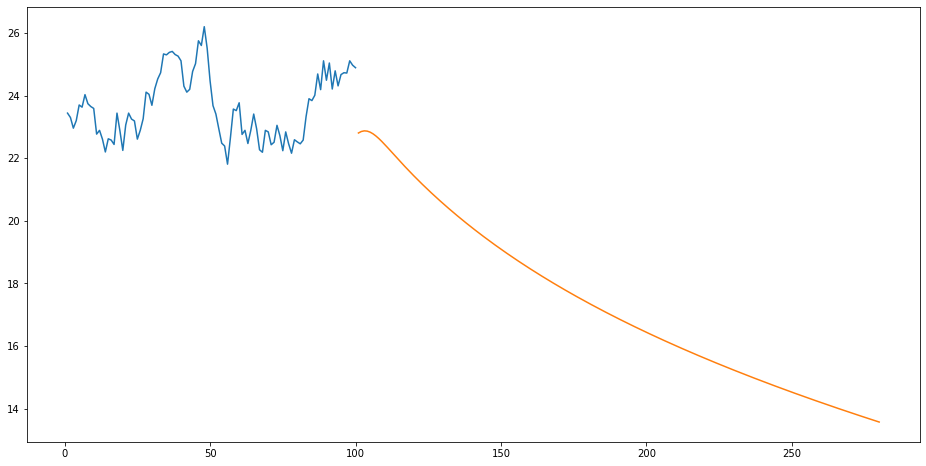

In [46]:
plt.figure(figsize=(16,8))
plt.plot(day_new,scaler.inverse_transform(df1[len(df1)-100:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
print(len(lst_output))

In [47]:
from datetime import datetime

#date = pd.date_range(datetime.today(), periods = 30).tolist()
datelist = pd.date_range(datetime.today(), periods=180).tolist()
datelist[0]


Timestamp('2022-04-01 15:34:54.904014', freq='D')

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


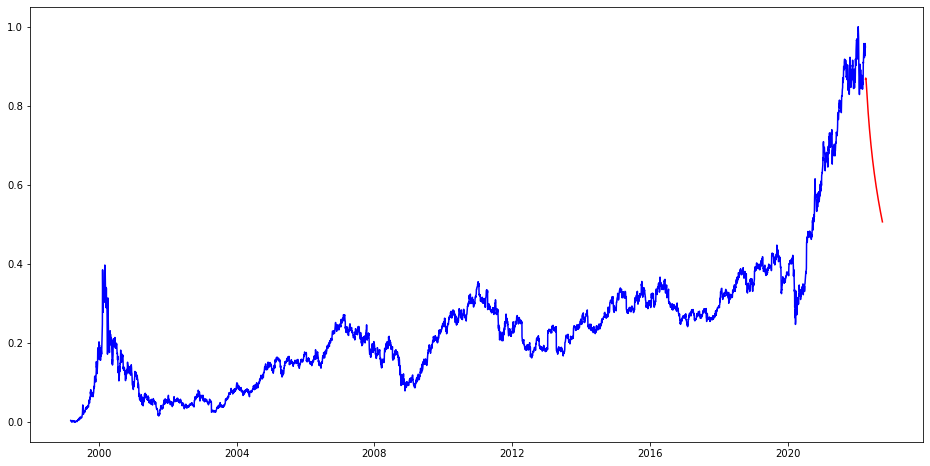

In [48]:
plt.figure(figsize=(16,8))
df3=df1.tolist()
df3.extend(lst_output)

plt.plot(df['Date'], df3[:len(df1)], color="blue")
plt.plot(datelist, df3[len(df1):], color="red")
print(type(df['Date'][0]))

In [49]:
df1

array([[0.00420027],
       [0.00404755],
       [0.00145099],
       ...,
       [0.95738025],
       [0.9519061 ],
       [0.94877805]])

In [50]:
df3=scaler.inverse_transform(df3).tolist()

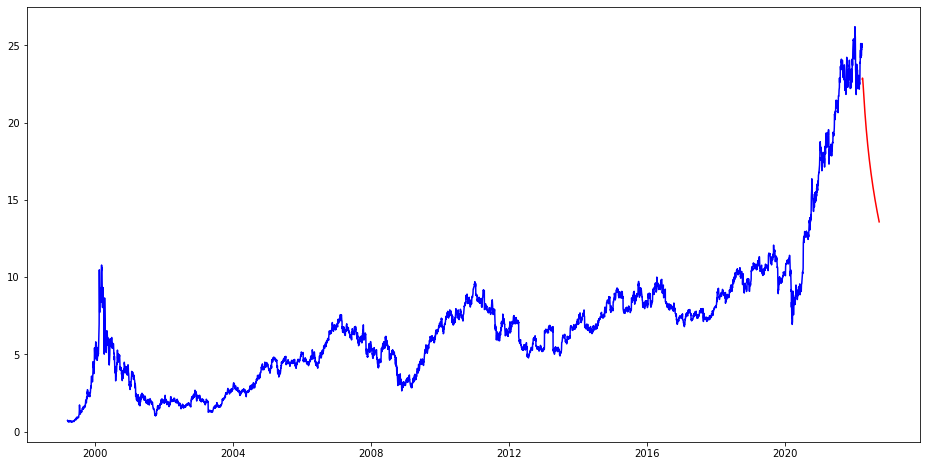

In [51]:
plt.figure(figsize=(16,8))
plt.plot(df['Date'], df3[:len(df1)], color="blue")
plt.plot(datelist, df3[len(df1):], color="red")